# Lab Course Machine Learning
### Exercise Sheet 9
#### Prof. Dr. Dr. Lars Schmidt-Thieme, Hadi Samer Jomaa
Information Systems and Machine Learning Lab
#### University of Hildesheim
January 8th, 2018

Submission on January 15th, 2018 at 10:00 am, (on moodle, course code 3113)

### Instructions
Please read the lab related instructions, i.e. submission, report format and policies, at https://www.ismll.uni-hildesheim.de/lehre/prakAIML-16w/exercises/ml_lab_instructions.pdf

### Datasets
1. MNIST Dataset: The MNIST database of handwritten digits, available from this page, has a training set of 60,000 examples, and a test set of 10,000 examples. http://yann.lecun.com/exdb/mnist/

## Exercise 1 Neural Network with Tensorflow (20 Points)
#### Objetive: Build a Neural Network with Tensorflow 
Artificial neural networks or connectionist systems are computing systems inspired by the biological neural networks that constitute animal brains 
In this exercise, your objective is to familiarize yourself with Tensorflow by creating a small neural network for digit classification.

Tasks
1. Download the MNIST Dataset and split the training set into a new training set 1 and validation set 70% and 30%(1 points)

2. Set-up a simple Neural Network with one hidden layer and 15 hidden node and define a suitable loss function and optimizer. Don’t forget to set a learning rate. (4 points)

3. Train the Neural Network on the training set 1 for 500 iterations or convergence, whichever is achieved first. [Hint:] It is advised to break down the training set 1 into batches and loop over them during training. (4 points)

4. After every epoch:

    a) Record of the accuracy of the model when tested on the validation set and on training set 1
    
    b) Calculate the difference in the value of the loss functon over training set 1 between epochs
    
    At the end, plot (a) and (b) on seperate graphs versus the epochs.(2 points)

5. Save the model using tf.train.Saver Class (2 points)

6. Load the model and test it on the test set. Note down the performance (accuracy).(3 point)

7. Do a grid search over the number of hidden layers {1,2} and number of nodes per layer {15,25} and repeat parts 4 through 7. (3 points)

8. Comment on the effect of hidden layers and hidden nodes on the performance. (1 point) [Note:] The MNIST Dataset is already divided into train/test set.

## Importing libraries

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
import random as ran
import tensorflow as tf
import itertools as it
import time
import pandas as pd
from tensorflow.examples.tutorials.mnist import input_data

/usr/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: compiletime version 3.5 of module 'tensorflow.python.framework.fast_tensor_util' does not match runtime version 3.6
  return f(*args, **kwds)


## MNIST Brief and Data Splitting

MNIST is a simple computer vision dataset that consists of images of handwritten digits and the labels for each image, telling us which digit it is. 

Using the example on MNIST data and softmax regression (https://www.tensorflow.org/get_started/mnist/beginners), there is a function that automatically download the data and display it in 1D vector form.

This function will split the MNIST data into three parts: 
    - 55,000 data points of training data (mnist.train.images, mnist.train.labels) 
    - 10,000 points of test data (mnist.test.images, mnist.test.labels)
    - 5,000 points of validation data (mnist.validation.images, mnist.validation.labels)

As every MNIST data point has their corresponding label, the images will be assigned to an "x" variable and the labels to a "y" variable.


Each image consits in a grid of 28x28 pixels that can be flattened into vector of 28x28 = 784 numbers that indicate that pixel's intensity as a number between 0 and 1. This is the size of the input layer.

    -Note: Flattening the data throws away information about the 2D structure of the image but this exercise's objetive is to get familiar with the usage of tensorflow, and thus, this simple method (a softmax regression) work just fine



In [2]:
#Importing MNIST data set
mnist = input_data.read_data_sets("/home/salvatore/MNIST_data", one_hot=True)

Extracting /home/salvatore/MNIST_data/train-images-idx3-ubyte.gz
Extracting /home/salvatore/MNIST_data/train-labels-idx1-ubyte.gz
Extracting /home/salvatore/MNIST_data/t10k-images-idx3-ubyte.gz
Extracting /home/salvatore/MNIST_data/t10k-labels-idx1-ubyte.gz


## Simple Neural Network (1 Layer, 15/16 Nodes)

In this part of the exercise is requested to build a simple neural network and show:
    - Convergence of the cost function to zero (0)
        - The data is divided into minibatchs of size 100 (55000/100 = 550 minibatchs/epoch), and the decrease of the cost function between epochs is tracked (denoted as Cost(t-1) - Cost(t), where "t" is the current epoch) until a    
        fixed number of epochs (500) is reached, or the difference in the cost function is smaller than 1e-3.
    
    - Convergence of the Accuracy:
        - Accuracy is also measured between epochs: Accuracy on Train Data, Test Data, and Validation Data. The main objetive is to identify the degree of overfitting that would occur after a certain number of epochs (or a treshold of the cost function) is reached

Convergence reached, epochs: 35
Optimization Finished!, time: 46.130001068115234 seconds


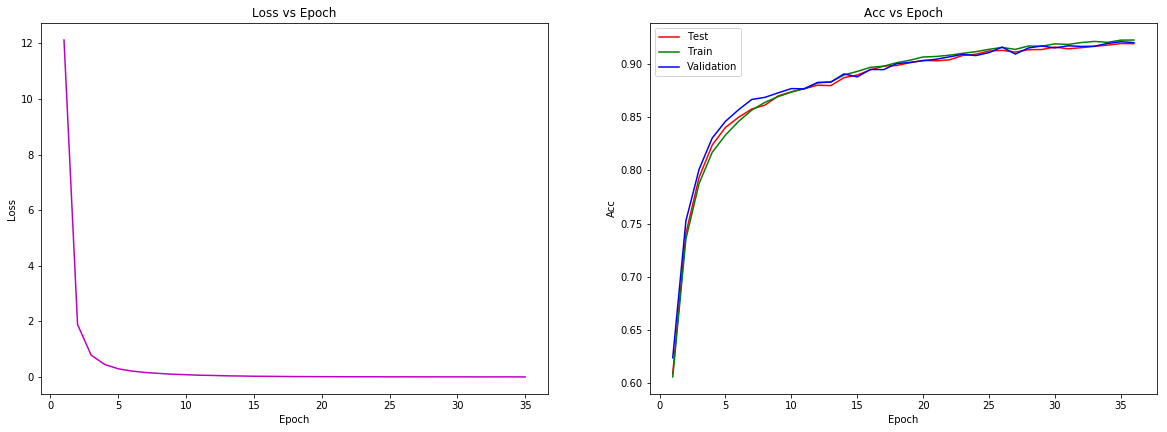

Final Accuracy on train: 0.922436 Nodes:  15
Final Accuracy on test: 0.919 Nodes:  15
----------------------------
Convergence reached, epochs: 41
Optimization Finished!, time: 52.13450002670288 seconds


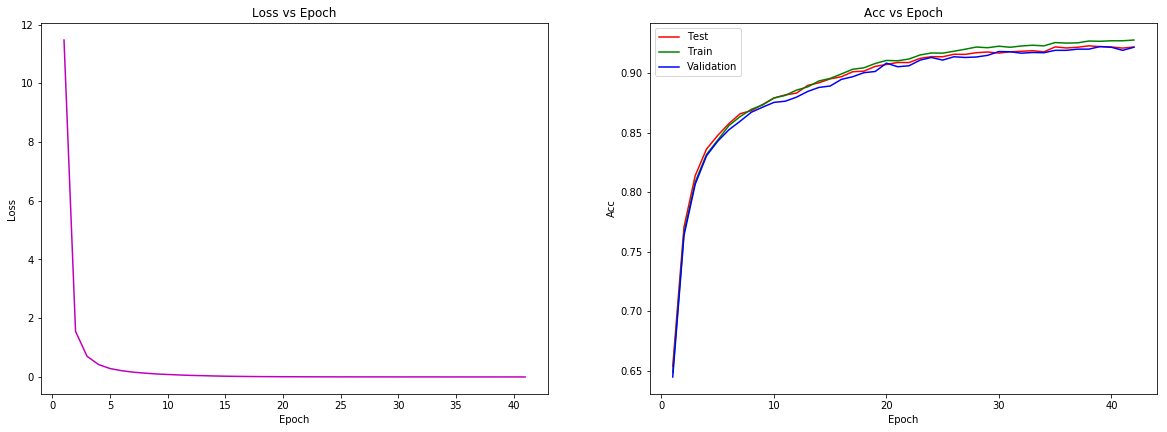

Final Accuracy on train: 0.928091 Nodes:  16
Final Accuracy on test: 0.9222 Nodes:  16
----------------------------
Best score: 0.9222 Number of Nodes:  16


In [85]:
# List of nodes tested in hidden layer
n_hidden_1 = np.arange(15,17) # 1st layer number of features

# tf Graph input
X = tf.placeholder("float", [None, 784])  # MNIST data input (img shape: 28*28)
Y = tf.placeholder("float", [None, 10]) # MNIST total classes (0-9 digits)

# Parameters
learning_rate = 0.001
training_epochs = 500
batch_size = 100
best_score = 0

#Script to run over the list of nodes to be tested 
for node in n_hidden_1:

    #To keep track of the performance of the optimization process
    start_time = time.time()
    
    # Store layers weight & bias
    weights = {
        'h1': tf.Variable(tf.random_normal([784, node])),
        'out': tf.Variable(tf.random_normal([node, 10]))
    }
    biases = {
        'b1': tf.Variable(tf.random_normal([node])),
        'out': tf.Variable(tf.random_normal([10]))
    }

    # Create model
    def Model(x):
        # Hidden fully connected layer with "n" neurons
        layer_1 = tf.add(tf.matmul(x, weights['h1']), biases['b1'])
        # Output fully connected layer with a neuron for each class
        out_layer = tf.matmul(layer_1, weights['out']) + biases['out']
        return out_layer

    # Construct model
    logits = Model(X)

    # Loss function
    loss_op = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(logits=logits, labels=Y))
    
    #Optimizer
    optimizer = tf.train.AdamOptimizer(learning_rate=learning_rate)
    train_op = optimizer.minimize(loss_op)

    # Initializing the variables
    init = tf.global_variables_initializer()
    
    #Runing the network
    with tf.Session() as sess:
        sess.run(init)
        
        # Defining how to apply softmax to logits
        pred = tf.nn.softmax(logits)  
        
        # Defining how to predict
        correct_prediction = tf.equal(tf.argmax(pred, 1), tf.argmax(Y, 1))
        
        # Defininf accuracy
        accuracy = tf.reduce_mean(tf.cast(correct_prediction, "float"))
        
        #Keep track of the Cost value across epoch
        cost_p = 0  #p -> previous epoch
        cost_a = 0  #a -> actual epoch
        
        #Keep track of the difference in Cost value on Epoch(t) - Epoch(t+1)
        cost= []
        
        #This list will store the accuracy obtained on each epoch
        acc_t = []
        acc_cv = []
        acc_tr = [] 
        
        # Training cycle
        for epoch in range(training_epochs):
            
            avg_cost = 0
            total_batch = int(mnist.train.num_examples/batch_size)
            
            # Loop over all batches
            for i in range(total_batch):
                batch_x, batch_y = mnist.train.next_batch(batch_size)
                
                # Run optimization op (backprop) and cost op (to get loss value)
                _, c = sess.run([train_op, loss_op], feed_dict={X: batch_x,Y: batch_y})
                
                # Compute average loss
                avg_cost += c / total_batch

            # Storing the accuracy on Test, Train and Validation Data, across epochs
            
            acc_t.append(accuracy.eval(session=sess, feed_dict={X: mnist.test.images, Y: mnist.test.labels}))
            acc_tr.append(accuracy.eval(session=sess, feed_dict={X: mnist.train.images, Y: mnist.train.labels}))
            acc_cv.append(accuracy.eval(session=sess, feed_dict={X: mnist.validation.images, Y: mnist.validation.labels}))
            
            if epoch ==0:           
                cost_p= avg_cost
            if epoch >0:
                cost_a = cost_p
                cost_p = avg_cost
                
                #Keeping track of the cost difference across epochs
                diff = cost_a-cost_p
                cost.append(diff)
            
            #Convergence Criterion
                if diff<1e-3:
                    #Show at which epoch the convergence was achieved :)
                    print("Convergence reached, epochs:", epoch)
                    break                   
        print("Optimization Finished!, time: %s seconds" %(time.time()-start_time))
        
        #Plot for Loss Function differences
        plt.figure(figsize=(20,15))
        plt.subplot(221)
        plt.title("Loss vs Epoch")
        plt.xlabel("Epoch")
        plt.ylabel("Loss")
        plt.plot(np.arange(len(cost))+1,cost,'-m')

        #Plot of accuracy
        plt.subplot(222)
        plt.title("Acc vs Epoch")
        plt.xlabel("Epoch")
        plt.ylabel("Acc")
        plt.plot(np.arange(len(acc_t))+1,acc_t,'-r')
        plt.plot(np.arange(len(acc_tr))+1,acc_tr,'-g')
        plt.plot(np.arange(len(acc_cv))+1,acc_cv,'-b')
        plt.legend(["Test","Train","Validation"])
        plt.show()
        
        #Final accuracy
        fin_acc =  accuracy.eval(session=sess, feed_dict={X: mnist.test.images, Y: mnist.test.labels})
        fin_acctr =  accuracy.eval(session=sess, feed_dict={X: mnist.train.images, Y: mnist.train.labels})
        
        #Keeping track of the parameters for the best score achieved
        if fin_acc > best_score:
            best_score = fin_acc
            best_param = [node,best_score]
            
        print("Final Accuracy on train:",fin_acctr,"Nodes: ", node)
        print("Final Accuracy on test:",fin_acc,"Nodes: ", node)
        print("----------------------------")
        
print("Best score:",best_param[1],"Number of Nodes: ", best_param[0])

## Crossvalidation (1 Layer, Nodes: {15:25})

The previous script was modified to only keep track of the final accuracy (the accuracy over epoch is now ommited, as this would represent a huge number of plots)

To have a better visualization of the results, the final accuracy vs #nodes for the Train, Test and Validation Data was plotted.

Also, for performance comparison, the time vs #nodes was also plotted

-----------------------------


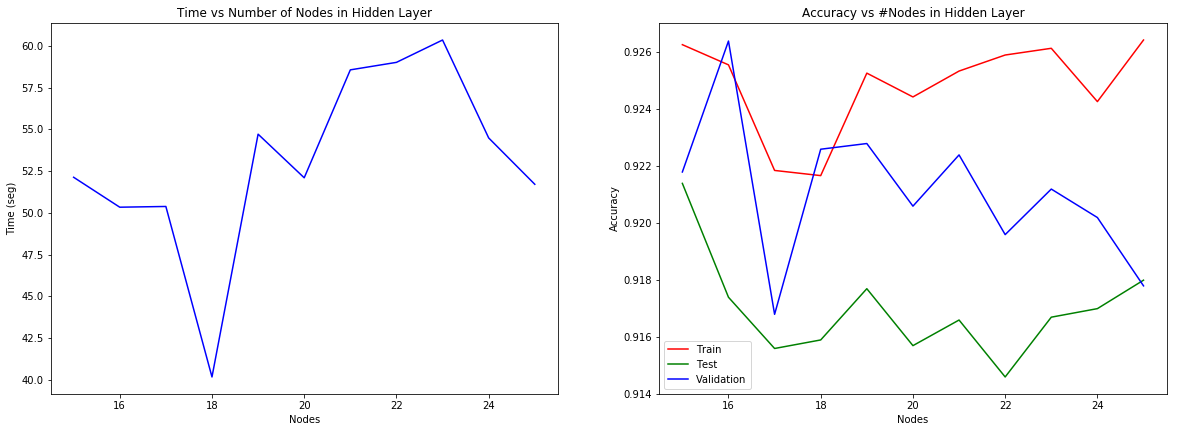

Best score: 0.9214 Number of Nodes:  15


In [164]:
# List of nodes tested in hidden layer
n_hidden_1 = np.arange(15,26) # 1st layer number of features

# tf Graph input
X = tf.placeholder("float", [None, 784])  # MNIST data input (img shape: 28*28)
Y = tf.placeholder("float", [None, 10]) # MNIST total classes (0-9 digits)

# Parameters
learning_rate = 0.001
training_epochs = 500
batch_size = 100
best_score = 0
Tr = []
Ts = []
Cv = []
T = []

#Script to run over the list of nodes to be tested 
for node in n_hidden_1:

    #To keep track of the performance of the optimization process
    start_time = time.time()
    
    # Store layers weight & bias
    weights = {
        'h1': tf.Variable(tf.random_normal([784, node])),
        'out': tf.Variable(tf.random_normal([node, 10]))
    }
    biases = {
        'b1': tf.Variable(tf.random_normal([node])),
        'out': tf.Variable(tf.random_normal([10]))
    }

    # Create model
    def Model(x):
        
        # Hidden fully connected layer with 15 neurons
        layer_1 = tf.add(tf.matmul(x, weights['h1']), biases['b1'])
        
        # Output fully connected layer with a neuron for each class
        out_layer = tf.matmul(layer_1, weights['out']) + biases['out']
        return out_layer

    # Construct model
    logits = Model(X)

    # Loss function
    loss_op = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(logits=logits, labels=Y))
    
    #Optimizer
    optimizer = tf.train.AdamOptimizer(learning_rate=learning_rate)
    train_op = optimizer.minimize(loss_op)

    # Initializing the variables
    init = tf.global_variables_initializer()
    
    #Runing the network
    with tf.Session() as sess:
        sess.run(init)
        
        #Keep track of the Cost value across epoch
        cost_p =0
        cost_a = 0
        
        # Training cycle
        for epoch in range(training_epochs):
            
            avg_cost = 0
            total_batch = int(mnist.train.num_examples/batch_size)
            # Loop over all batches
            for i in range(total_batch):
                batch_x, batch_y = mnist.train.next_batch(batch_size)
                # Run optimization op (backprop) and cost op (to get loss value)
                _, c = sess.run([train_op, loss_op], feed_dict={X: batch_x,Y: batch_y})
                # Compute average loss
                avg_cost += c / total_batch
       
            if epoch ==0:
                cost_p= avg_cost
            if epoch >0:
                cost_a = cost_p
                cost_p = avg_cost
                diff = cost_a-cost_p
            
            #Convergence Criterion
                if diff<1e-3:
                    break
        
        #End of time tracking               
        t= time.time()-start_time
        
        # Defining how to apply softmax to logits
        pred = tf.nn.softmax(logits)  
        
        # Defining how to predict
        correct_prediction = tf.equal(tf.argmax(pred, 1), tf.argmax(Y, 1))
        
        # Defininf accuracy
        accuracy = tf.reduce_mean(tf.cast(correct_prediction, "float"))
                
        # Storing Parameters
        Acc_t =  accuracy.eval(session=sess, feed_dict={X: mnist.test.images, Y: mnist.test.labels})
        Acc_tr = accuracy.eval(session=sess, feed_dict={X: mnist.train.images, Y: mnist.train.labels})
        Acc_cv = accuracy.eval(session=sess, feed_dict={X: mnist.validation.images, Y: mnist.validation.labels})
        Tr.append(Acc_tr)
        Ts.append(Acc_t)
        Cv.append(Acc_cv)
        T.append(t)
        
        if Acc_t > best_score:
            best_score = Acc_t
            best_param = [node,best_score]
print("-----------------------------")

#Ploting Time vs Number of nodes in Hidden Layer
plt.figure(figsize=(20,15))
plt.subplot(221)
plt.title("Time vs Number of Nodes in Hidden Layer")
plt.xlabel("Nodes")
plt.ylabel("Time (seg)")
plt.plot(n_hidden_1,T,'-b')

#Ploting Accuracy vs Number of nodes in Hidden Layer
plt.subplot(222)
plt.title("Accuracy vs #Nodes in Hidden Layer")
plt.xlabel("Nodes")
plt.ylabel("Accuracy")
plt.plot(n_hidden_1,Tr,'-r')
plt.plot(n_hidden_1,Ts,'-g')
plt.plot(n_hidden_1,Cv,'-b')
plt.legend(["Train", "Test","Validation"])

plt.show()

print("Best score:",best_param[1],"Number of Nodes: ", best_param[0])

In [165]:
df1 = pd.DataFrame({"1 #Nodes":n_hidden_1,"2 Acc Train":Tr,"3 Acc Test":Ts,"4 Acc Validation":Cv,"5 Time":T})
print("Results of Validation 1-Layer, N-Nodes")
df1

Results of Validation 1-Layer, N-Nodes


,1 #Nodes,2 Acc Train,3 Acc Test,4 Acc Validation,5 Time
0,15,0.926273,0.9214,0.9218,52.133023
1,16,0.925564,0.9174,0.9264,50.339801
2,17,0.921855,0.9156,0.9168,50.383481
3,18,0.921673,0.9159,0.9226,40.168920
4,19,0.925273,0.9177,0.9228,54.715507
5,20,0.924436,0.9157,0.9206,52.102241
6,21,0.925345,0.9166,0.9224,58.568392
7,22,0.925909,0.9146,0.9196,59.017323
8,23,0.926145,0.9167,0.9212,60.356791
9,24,0.924273,0.9170,0.9202,54.489724


In [253]:
df1.describe()

,1 #Nodes,2 Acc Train,3 Acc Test,4 Acc Validation,5 Time
count,11.000000,11.000000,11.000000,11.000000,11.000000
mean,20.000000,0.924835,0.916964,0.921109,53.089835
std,3.316625,0.001669,0.001785,0.002610,5.551437
min,15.000000,0.921673,0.914600,0.916800,40.168920
25%,17.500000,0.924355,0.915800,0.919900,51.048231
50%,20.000000,0.925345,0.916700,0.921200,52.133023
75%,22.500000,0.926027,0.917550,0.922500,56.641949
max,25.000000,0.926436,0.921400,0.926400,60.356791


## Grid Search (2 Layers, Nodes: {15:25})

The previous script was modified again, to include a second layer. The cross-validation scrip now will test the combination of nodes between each of them and keep track of the final accuracy obtained for each of them.

To have a better visualization of the results, a 3D plot the final accuracy vs #nodes in Layer 1 vs #nodes in Layer 2 for the Train, Test and Validation Data was created.

Also, for performance comparison, the time vs #nodes was also plotted

In [146]:
# Network Parameters
n_hidden_1 = np.arange(15,26,2) # 1st layer number of features
n_hidden_2 = np.arange(15,26,2) # 1st layer number of features
combinations = np.array(list(it.product(n_hidden_1,n_hidden_2)))

# tf Graph input
X = tf.placeholder("float", [None, 784])  # MNIST data input (img shape: 28*28)
Y = tf.placeholder("float", [None, 10]) # MNIST total classes (0-9 digits)

# Parameters
learning_rate = 0.001
training_epochs = 500
batch_size = 100
best_score = 0
Tr2 = []
Ts2 = []
Cv2 = []
T2 = []

for i in range(len(combinations)):
    node1, node2 = combinations[i]
    start_time = time.time()
    # Store layers weight & bias
    weights = {
        'h1': tf.Variable(tf.random_normal([784, node1])),
        'h2': tf.Variable(tf.random_normal([node1, node2])),
        'out': tf.Variable(tf.random_normal([node2, 10]))
    }
    biases = {
        'b1': tf.Variable(tf.random_normal([node1])),
        'b2': tf.Variable(tf.random_normal([node2])),
        'out': tf.Variable(tf.random_normal([10]))
    }

    # Create model
    def multilayer_perceptron(x):
        # Hidden fully connected layer with "n" neurons
        layer_1 = tf.add(tf.matmul(x, weights['h1']), biases['b1'])
        layer_2 = tf.add(tf.matmul(layer_1, weights['h2']), biases['b2'])
        # Output fully connected layer with a neuron for each class
        out_layer = tf.matmul(layer_2, weights['out']) + biases['out']
        return out_layer

    # Construct model
    logits = multilayer_perceptron(X)

    # Define loss and optimizer
    loss_op = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(logits=logits, labels=Y))
    optimizer = tf.train.AdamOptimizer(learning_rate=learning_rate)
    train_op = optimizer.minimize(loss_op)

    # Initializing the variables
    init = tf.global_variables_initializer()

    with tf.Session() as sess:
        sess.run(init)
        
        #Keep track of the Cost value across epoch
        cost_p =0
        cost_a = 0
        # Training cycle
        for epoch in range(training_epochs):
            
            avg_cost = 0
            total_batch = int(mnist.train.num_examples/batch_size)
            # Loop over all batches
            for i in range(total_batch):
                batch_x, batch_y = mnist.train.next_batch(batch_size)
                # Run optimization op (backprop) and cost op (to get loss value)
                _, c = sess.run([train_op, loss_op], feed_dict={X: batch_x,Y: batch_y})
                # Compute average loss
                avg_cost += c / total_batch
       
            if epoch ==0:
                cost_p= avg_cost
            if epoch >0:
                cost_a = cost_p
                cost_p = avg_cost
                diff = cost_a-cost_p
            #Convergence Criterion
                if diff<1e-3:
                    #print("Convergence reached, epochs:", epoch)
                    break
                           
        t= time.time()-start_time
        
        pred = tf.nn.softmax(logits)  # Apply softmax to logits
        #print (pred)
        correct_prediction = tf.equal(tf.argmax(pred, 1), tf.argmax(Y, 1))
        
        # Calculate accuracy
        accuracy = tf.reduce_mean(tf.cast(correct_prediction, "float"))
        
        # Storing Parameters
        Acc_t =  accuracy.eval(session=sess, feed_dict={X: mnist.test.images, Y: mnist.test.labels})
        Acc_tr = accuracy.eval(session=sess, feed_dict={X: mnist.train.images, Y: mnist.train.labels})
        Acc_cv = accuracy.eval(session=sess, feed_dict={X: mnist.validation.images, Y: mnist.validation.labels})
        Tr2.append(Acc_tr)
        Ts2.append(Acc_t)
        Cv2.append(Acc_cv)
        T2.append(t)
        
        if Acc_t > best_score:
            best_score = Acc_t
            best_param = [node1,node2,best_score]
    
print("Best score:",best_param[2],"#Nodes Layer 1: ", best_param[0],"#Nodes Layer 2: ", best_param[1])

Best score: 0.9166 #Nodes Layer 1:  17 #Nodes Layer 2:  15


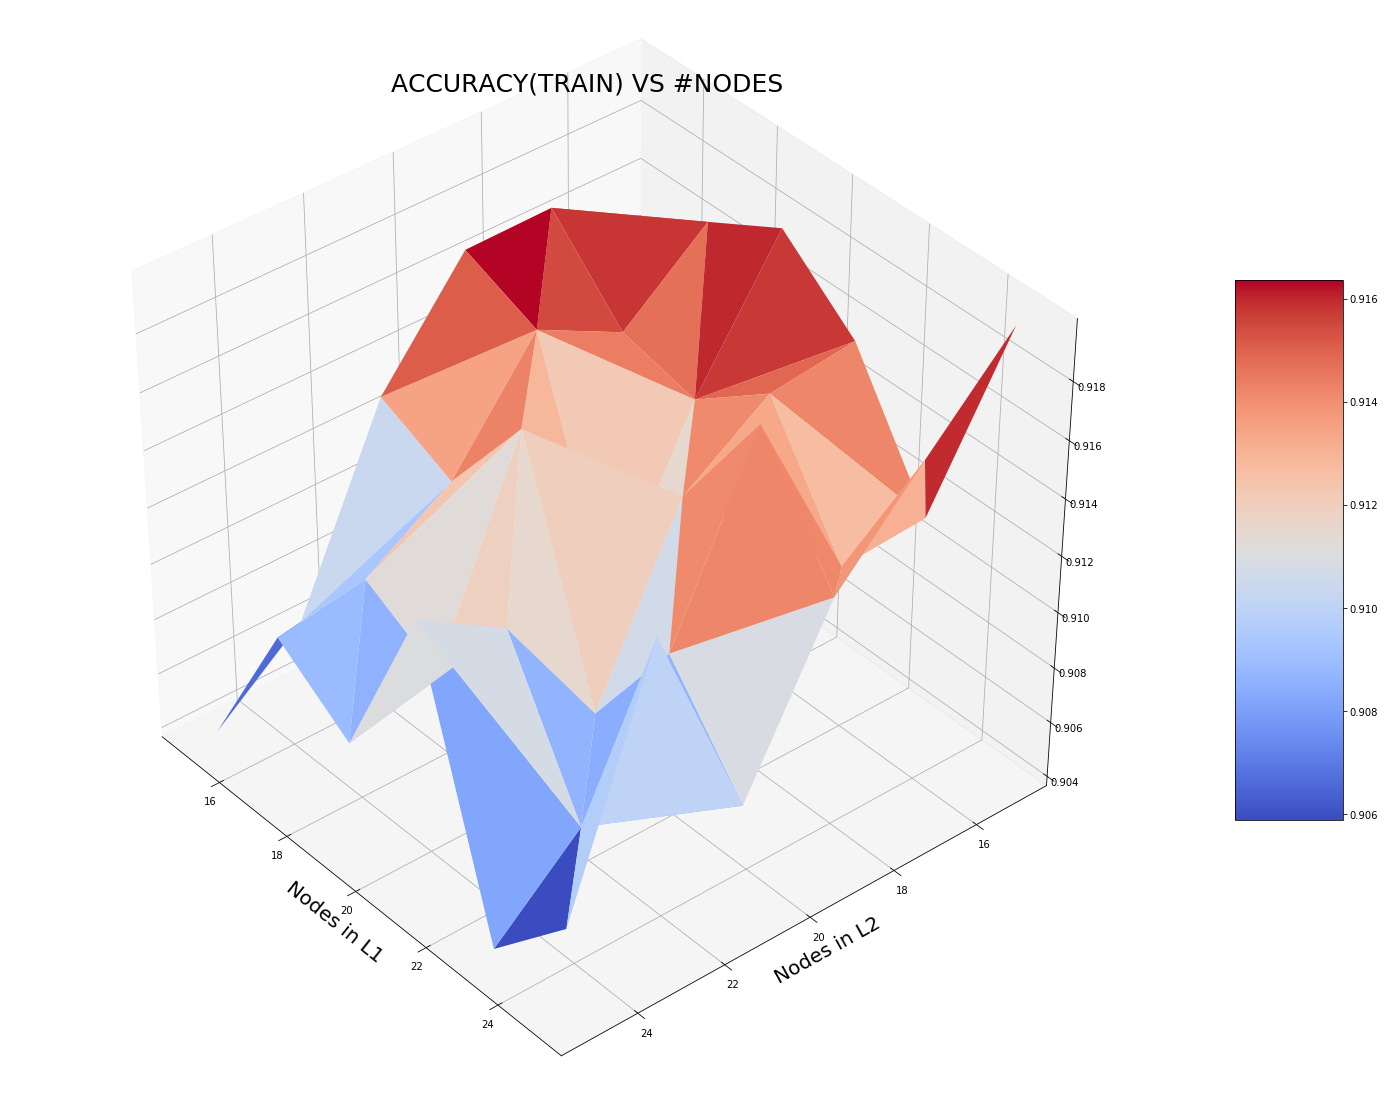

In [241]:
fig= plt.figure(figsize=(20,15))
ax= Axes3D(fig)
x = combinations[:,0]
y = combinations[:,1]
z = Tr2

df = pd.DataFrame({"Nodes_L1":x,"Nodes_L2":y,"Accuracy":z})

surf = ax.plot_trisurf(df.Nodes_L1,df.Nodes_L2,df.Accuracy,cmap=cm.coolwarm,linewidth = 0.1)
fig.colorbar(surf,shrink=0.5,aspect = 5)
ax.view_init(40,140)
plt.gca().invert_xaxis()
plt.title("ACCURACY(TRAIN) VS #NODES",fontsize=25)
plt.ylabel("Nodes in L2",fontsize=20)
plt.xlabel("Nodes in L1",fontsize=20)
plt.show()

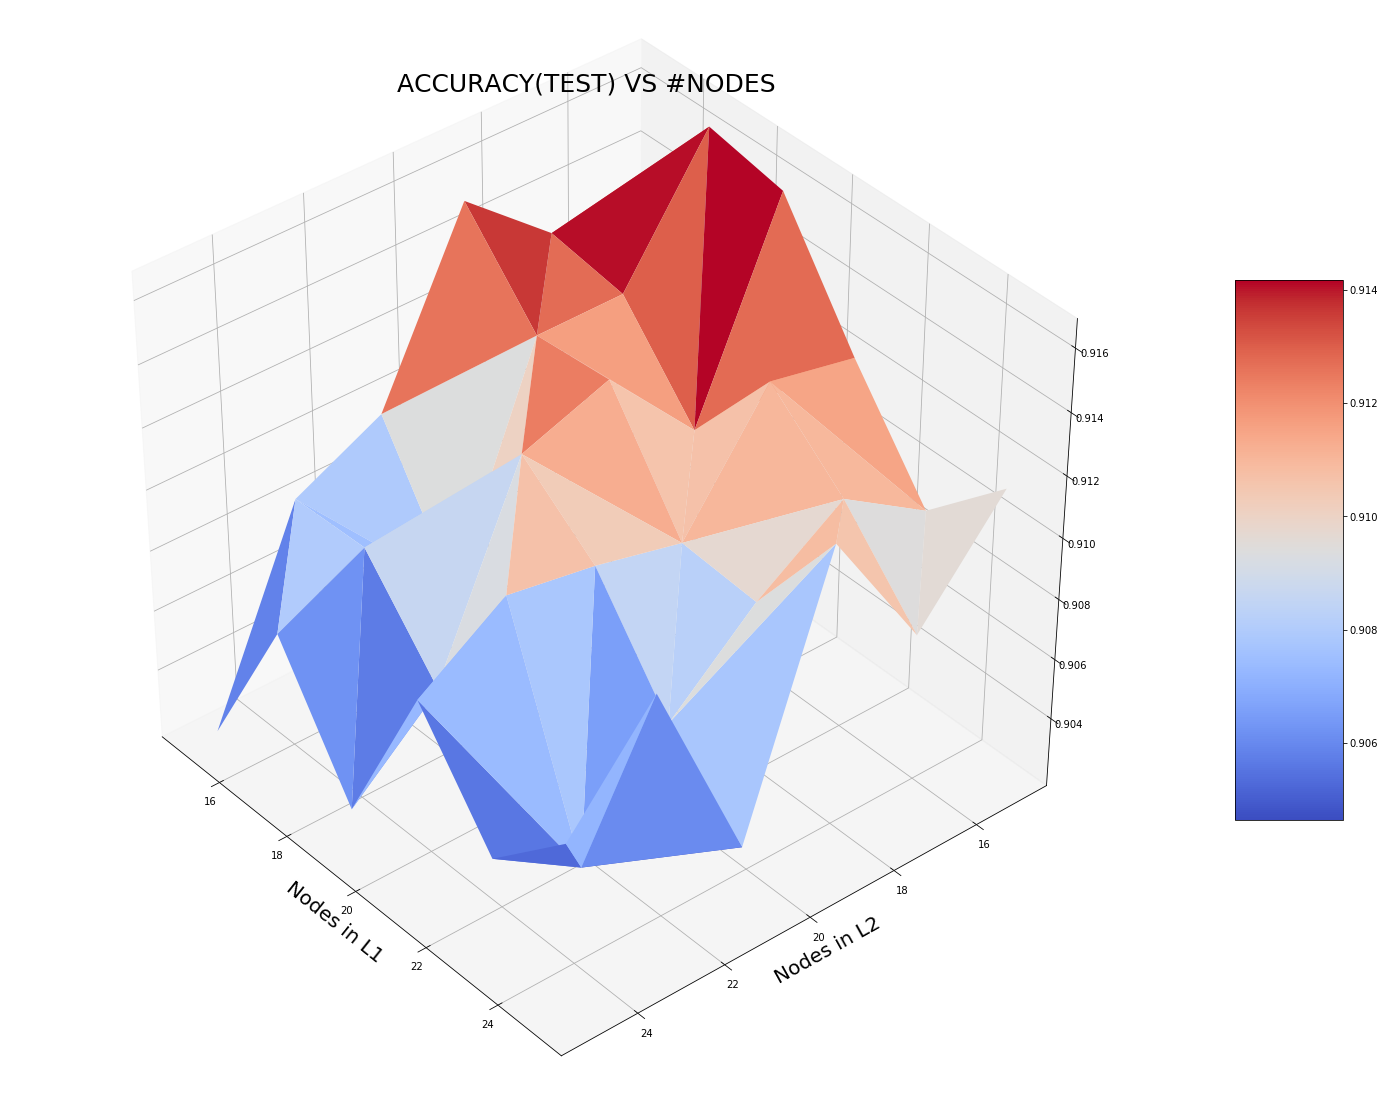

In [211]:
fig= plt.figure(figsize=(20,15))
ax= Axes3D(fig)
x = combinations[:,0]
y = combinations[:,1]
z = Ts2

df = pd.DataFrame({"Nodes_L1":x,"Nodes_L2":y,"Accuracy":z})

surf = ax.plot_trisurf(df.Nodes_L1,df.Nodes_L2,df.Accuracy,cmap=cm.coolwarm,linewidth = 0.1)
fig.colorbar(surf,shrink=0.5,aspect = 5)
ax.view_init(40,140)
plt.gca().invert_xaxis()
plt.title("ACCURACY(TEST) VS #NODES",fontsize=25)
plt.ylabel("Nodes in L2",fontsize=20)
plt.xlabel("Nodes in L1",fontsize=20)
plt.show()

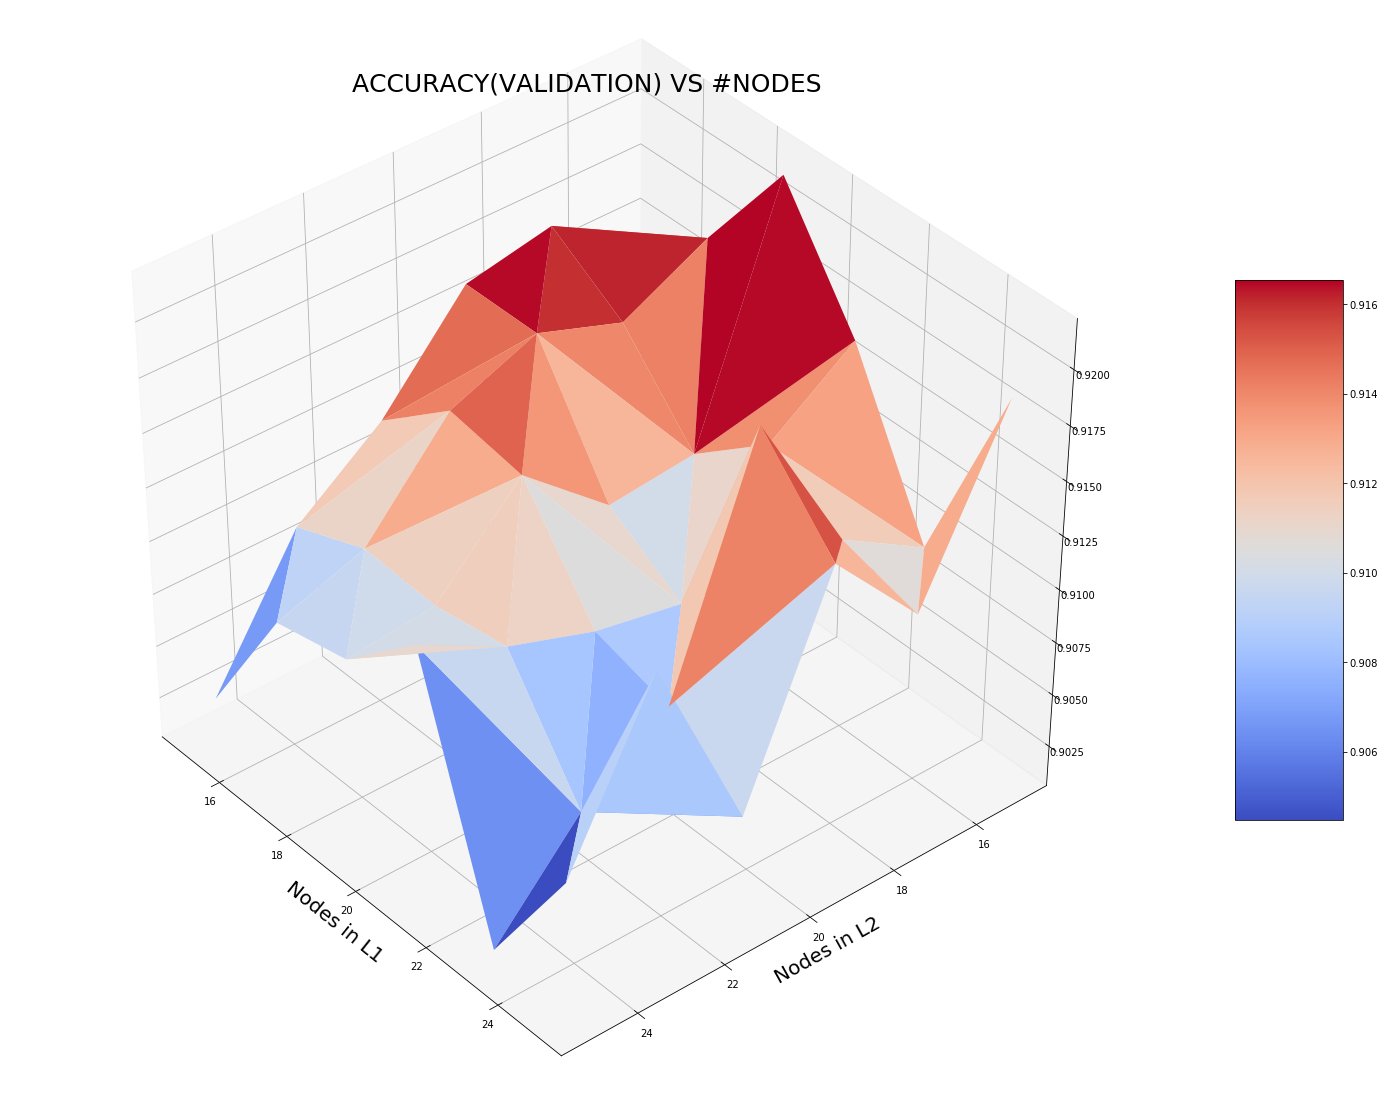

In [212]:
fig= plt.figure(figsize=(20,15))
ax= Axes3D(fig)
x = combinations[:,0]
y = combinations[:,1]
z = Cv2

df = pd.DataFrame({"Nodes_L1":x,"Nodes_L2":y,"Accuracy":z})

surf = ax.plot_trisurf(df.Nodes_L1,df.Nodes_L2,df.Accuracy,cmap=cm.coolwarm,linewidth = 0.1)
fig.colorbar(surf,shrink=0.5,aspect = 5)
ax.view_init(40,140)
plt.gca().invert_xaxis()
plt.title("ACCURACY(VALIDATION) VS #NODES",fontsize=25)
plt.ylabel("Nodes in L2",fontsize=20)
plt.xlabel("Nodes in L1",fontsize=20)
plt.show()

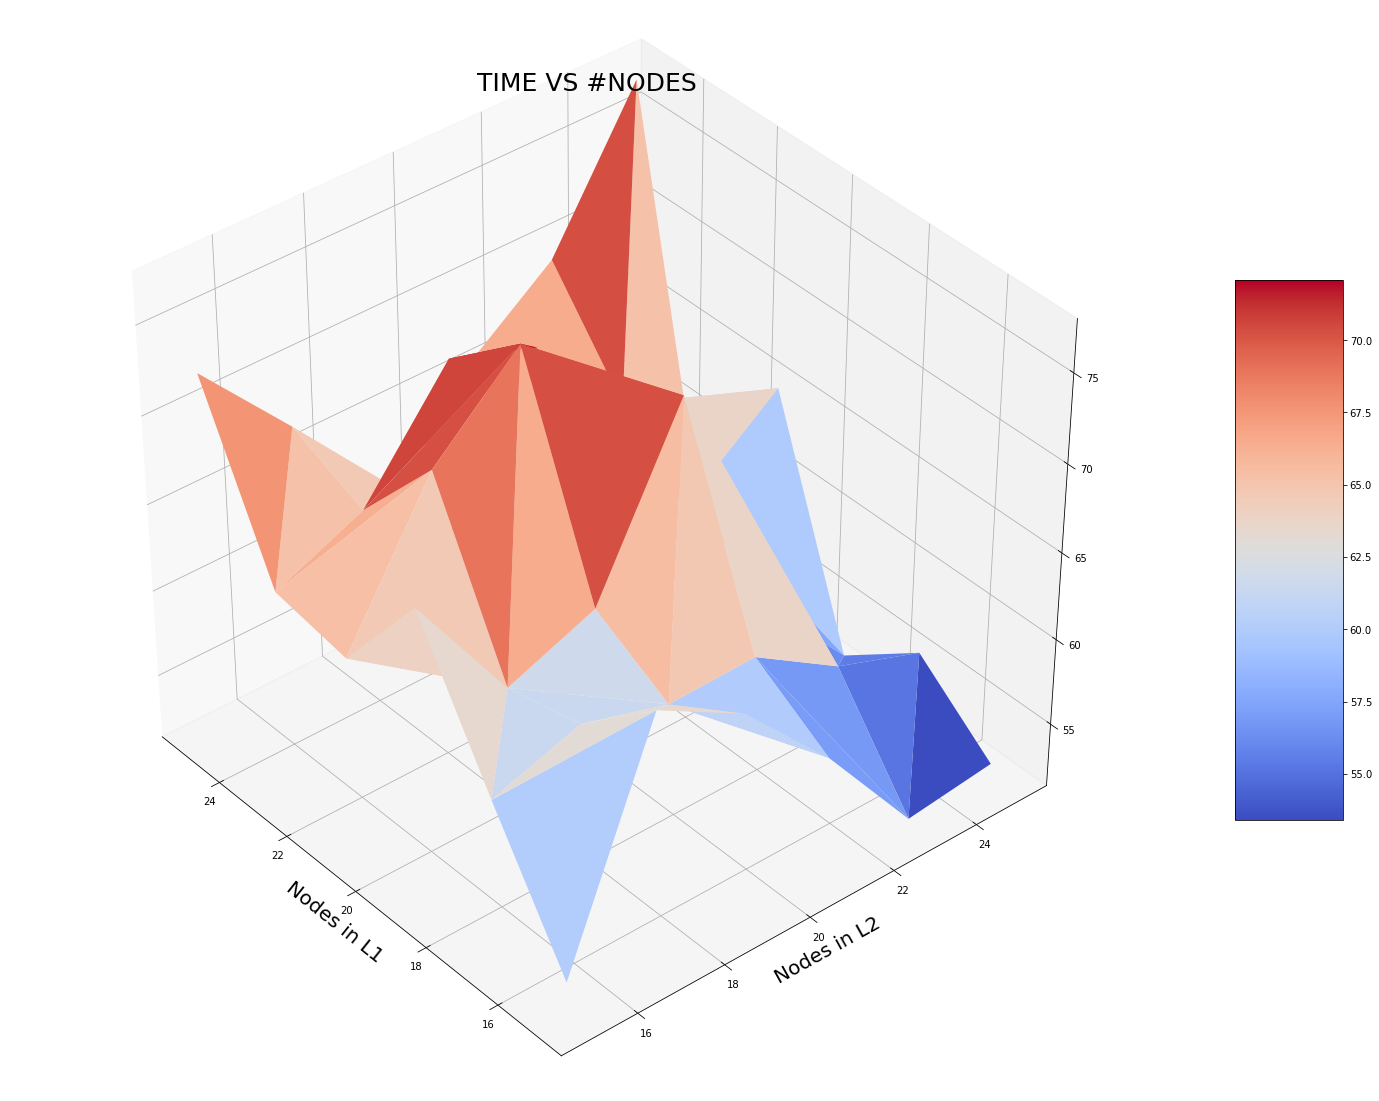

In [214]:
fig= plt.figure(figsize=(20,15))
ax= Axes3D(fig)
x = combinations[:,0]
y = combinations[:,1]
z = T2

df = pd.DataFrame({"Nodes_L1":x,"Nodes_L2":y,"Accuracy":z})

surf = ax.plot_trisurf(df.Nodes_L1,df.Nodes_L2,df.Accuracy,cmap=cm.coolwarm,linewidth = 0.1)
fig.colorbar(surf,shrink=0.5,aspect = 5)
ax.view_init(40,140)
plt.gca().invert_yaxis()
plt.title("TIME VS #NODES",fontsize=25)
plt.ylabel("Nodes in L2",fontsize=20)
plt.xlabel("Nodes in L1",fontsize=20)
plt.show()

## 2 Layers Grid Search Results - Table

In [247]:
df = pd.DataFrame({"1 Nodes_L1":x,"2 Nodes_L2":y,"3 Accuracy Train":Tr2,"4 Accuracy Test":Ts2,"5 Accuracy Validation":Cv2,"6 Time":T2})
df

,1 Nodes_L1,2 Nodes_L2,3 Accuracy Train,4 Accuracy Test,5 Accuracy Validation,6 Time
0,15,15,0.912364,0.9110,0.9124,53.326601
1,15,17,0.916745,0.9130,0.9170,66.300416
2,15,19,0.916691,0.9153,0.9162,63.438443
3,15,21,0.913018,0.9098,0.9118,58.195215
4,15,23,0.906436,0.9084,0.9088,51.823204
5,15,25,0.903982,0.9020,0.9026,52.421011
6,17,15,0.916527,0.9166,0.9168,60.679083
7,17,17,0.914109,0.9126,0.9148,62.341999
8,17,19,0.915636,0.9126,0.9162,60.807706
9,17,21,0.911818,0.9057,0.9146,60.911081


In [252]:
df.describe()

,1 Nodes_L1,2 Nodes_L2,3 Accuracy Train,4 Accuracy Test,5 Accuracy Validation,6 Time
count,36.000000,36.000000,36.000000,36.000000,36.000000,36.000000
mean,20.000000,20.000000,0.912147,0.909547,0.911811,63.359372
std,3.464102,3.464102,0.004176,0.003609,0.004574,6.523069
min,15.000000,15.000000,0.903982,0.902000,0.901000,51.823204
25%,17.000000,17.000000,0.908295,0.907400,0.909100,60.058116
50%,20.000000,20.000000,0.912691,0.909800,0.911400,63.186460
75%,23.000000,23.000000,0.915500,0.912450,0.914900,67.480550
max,25.000000,25.000000,0.919764,0.916600,0.921800,77.387994


## Discusion

### 1 Layer Model
   #### Convergence 
   From the first part of the exercise, it was showed that:      
      - The cost function converges to a minimum (treshold 1x10e-3, cost-function: softmax)
      - The average number of iterations to achieve convergence was 40 epochs (500 was not required)
#### Grid Search
- Average performances: {Train: 92.4%, Validation: 92.1%, Test: 91.7%}
          - Although there was not a clear tendency on the accuracy vs #Nodes over the Train data, it is clearly 
          observable that increasing the number of nodes has a decreasing effect on Validation and test Data, and 
          thus overfitting
          - The difference between Train and Testing data was less than 1%
- Average time: 53 secs per optimization
    - There is also no clear tendency on time performance vs #Nodes (probably due the nature of the stochastic-minibatch method of optimization), although the expectation is that it increases as increasing the number of nodes.
- Best Perfomance obtained: 92.14% on Test Data- 15 Nodes Layer
  
### 2 Layer Model
#### Grid Search
- Average performances: {Train: 91.21%, Validation: 91.18%, Test: 90.95%} 
    - For al the data sets, there was a clear tendency on higher accuracy using combinations of low nodes in both layers, resulting in overfitting on combinations with higher numbers of nodes
- Average time: 63.35 secs
    - It was also observed that time is also dependant on the number of nodes in both layers; it increases on combinations of higher nodes.
- Best Performance obtained: 91.66% on Test Data - 17 Nodes Layer 1/ 15 Nodes Layer 2



## Conclusion
- A simple model of neural network for image classification was learned
- The model with 1 layer outperformed the 2 layer model by aproximately 0.5% in terms of accuracy, and by 20% in terms of time execution
- Increasing the number of nodes tends to overfit the data
- The 1- Layer model with 15 nodes was found to be the best model for this classification task
